In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# Parameters
sample1 = 150
sample2 = 175
mean = 0
std_dev = 0.6
shape1 = (sample1, 2)
shape2 = (sample2, 2)

In [3]:
# Generate random values for two classes from a normal distribution
matrix1 = np.random.normal(mean, std_dev, shape1) + np.array([3, 4])
matrix2 = np.random.normal(mean, std_dev, shape2) + np.array([4, 3])

In [4]:
# Create labels: class 1 for matrix1 and class -1 for matrix2
labels1 = np.ones(sample1)
labels2 = -1 * np.ones(sample2)

In [5]:
# Combine samples and labels
matrix_concat = np.concatenate((matrix1, matrix2), axis=0)
matrix_labels = np.concatenate((labels1, labels2))

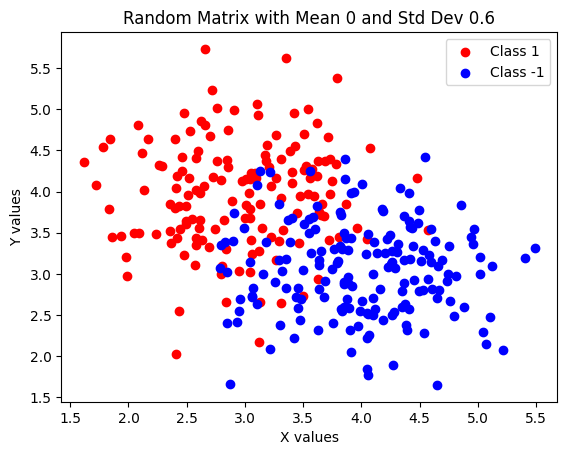

In [6]:
def show_graphic(matrix1, matrix2 = None):
    plt.scatter(matrix1[:, 0], matrix1[:, 1], color='red', label='Class 1')
    if matrix2 is not None:
        plt.scatter(matrix2[:, 0], matrix2[:, 1], color='blue', label='Class -1')
    plt.title('Random Matrix with Mean 0 and Std Dev 0.6')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.show()
show_graphic(matrix1, matrix2)

In [7]:
# Create a new random point
new_point = np.random.normal(mean, std_dev, size=(1, 2)) + np.array([3, 4])
print(f"New random point: {new_point}")

New random point: [[3.01538499 3.42353114]]


In [8]:
# Gaussian Kernel function
def gaussian_kernel(distance, bandwidth=1.0):
    return np.exp(- (distance ** 2) / (2 * bandwidth ** 2)) / math.sqrt(2 * math.pi)

In [9]:
freq1 = matrix1.shape[0]
freq2 = matrix2.shape[0]

In [10]:
# KNN function to classify a new point based on the k nearest neighbors
def knn_altered_classify(matrix, freq1, freq2, labels, new_point, k, h):
    #alfa1 = 1 / freq1
    #alfa2 = 1 / freq2
    alfa1 = 1
    alfa2 = 1
    distances = np.linalg.norm(matrix - new_point, axis=1)

    distances[:freq1] *= alfa1
    distances[freq1:] *= alfa2
    
    
    nearest_indices = np.argsort(distances)[:k] # Taking the index of nearest points.
    
    #distances = distances[nearest_indices] # Taking the distances of the nearest points.
    
    #weights = gaussian_kernel(distance = distances, bandwidth = h) # Calculating the kernel just of the nearest distances.
    
    weights = gaussian_kernel(distance = distances, bandwidth = h)
    
    points = labels[nearest_indices] # Taking the labels of the nearest points.
    
    weighted_distances = points * weights

    Q1 = []
    Q2 = []

    for i in range(weights.shape[0]):
        if labels[i] >= 0:
            Q1.append(weights[i])
        else:
            Q2.append(weights[i])

    Q1 = np.array(Q1).reshape(-1, 1)
    Q2 = np.array(Q2).reshape(-1, 1)
    #raise Exception(f"size weighted : {Q1.shape}, {Q2.shape}")
    kernel_N_dim = np.concatenate((Q1, Q2), axis = 1)
    return Kernel_N_dim

    #raise Exception(f"size weighted : {weighted_distances.shape}")
    #sum_labels = np.sum(weighted_distances)
    #return (1 if sum_labels > 0 else -1)

In [11]:
# Generate a mesh grid to plot decision boundary
def plot_decision_boundary(matrix, freq1, freq2, labels, k, h, resolution=0.1):
    x_min, x_max = matrix[:, 0].min() - 1, matrix[:, 0].max() + 1
    y_min, y_max = matrix[:, 1].min() - 1, matrix[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([knn_altered_classify(matrix, freq1, freq2, labels, point, k, h) for point in grid_points])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(matrix1[:, 0], matrix1[:, 1], color='red', label='Class 1')
    plt.scatter(matrix2[:, 0], matrix2[:, 1], color='blue', label='Class -1')
    plt.scatter(new_point[:, 0], new_point[:, 1], color='black', s=100, label='New Point')
    plt.title('Decision Boundary and Data Points')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend()
    plt.show()

    return Q1 and Q2

In [12]:
k = 6
Q1, Q2 = plot_decision_boundary(matrix_concat, freq1, freq2, matrix_labels, k, h = 0.1)
print("Plot saved as 'decision_boundary.png'.")

ValueError: operands could not be broadcast together with shapes (6,) (325,) 

In [ ]:
# 3D Surface Plot Function
def plot_3d_surface(matrix, freq1, freq2, labels, k, h):
    x_min, x_max = matrix[:, 0].min() - 1, matrix[:, 0].max() + 1
    y_min, y_max = matrix[:, 1].min() - 1, matrix[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([knn_altered_classify(matrix, freq1, freq2, labels, point, k, h) for point in grid_points])
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot_surface(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    ax.scatter(matrix1[:, 0], matrix1[:, 1], np.ones_like(matrix1[:, 0]) * 0.5, color='red', label='Class 1')
    ax.scatter(matrix2[:, 0], matrix2[:, 1], np.ones_like(matrix2[:, 0]) * 0.5, color='blue', label='Class -1')
    ax.scatter(new_point[:, 0], new_point[:, 1], 1, color='black', s=100, label='New Point')

    ax.set_title('3D Decision Surface')
    ax.set_xlabel('X values')
    ax.set_ylabel('Y values')
    ax.set_zlabel('Decision Boundary')
    ax.legend()

    plt.show()

In [ ]:
plot_3d_surface(matrix_concat, freq1, freq2, matrix_labels, k, h = 1)